In [1]:
# Description: This program attempts to predict future price of ETH

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight')


In [3]:
# Import ETH data
df = yf.download('ETH-USD',start='2021-01-02')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781
...,...,...,...,...,...,...
2022-05-09,2518.508301,2528.258057,2238.062744,2245.430420,2245.430420,36333567678
2022-05-10,2242.650391,2450.760254,2206.756836,2343.510986,2343.510986,38202099639
2022-05-11,2342.754150,2441.079346,2018.855591,2072.108643,2072.108643,45743399154


In [4]:
future_days = 5

In [5]:
# Create a new column for price n days from now
df[str(future_days)+'_Day_Price_Forecast'] = df[['Close']].shift(-future_days)
# Show the data
df[['Close', str(future_days)+'_Day_Price_Forecast']]
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,5_Day_Price_Forecast
Date,,,,,,,
2022-05-04,2783.131104,2956.686768,2779.273682,2940.644775,2940.644775,18186749944,2245.430420
2022-05-05,2940.226562,2948.960693,2704.916260,2749.213135,2749.213135,22642925048,2343.510986
2022-05-06,2748.931641,2754.837646,2645.335205,2694.979736,2694.979736,21027599270,2072.108643
2022-05-07,2694.991943,2696.652832,2599.523438,2636.093018,2636.093018,13369276367,1961.701538
2022-05-08,2636.121826,2638.830566,2498.430176,2517.459961,2517.459961,20802269935,2050.253418
2022-05-09,2518.508301,2528.258057,2238.062744,2245.430420,2245.430420,36333567678,NaN
2022-05-10,2242.650391,2450.760254,2206.756836,2343.510986,2343.510986,38202099639,NaN
2022-05-11,2342.754150,2441.079346,2018.855591,2072.108643,2072.108643,45743399154,NaN
2022-05-12,2072.504639,2170.458008,1748.303101,1961.701538,1961.701538,42463486402,NaN


In [6]:
X = np.array(df[['Close']])

# Remove last n=5 rows of data
X = X[:df.shape[0] - future_days]
X

array([[ 730.36755371],
       [ 774.53497314],
       [ 975.50769043],
       [1040.23303223],
       [1100.00610352],
       [1207.11218262],
       [1225.67810059],
       [1224.19714355],
       [1281.07727051],
       [1262.2467041 ],
       [1090.14538574],
       [1043.43457031],
       [1130.73937988],
       [1218.45300293],
       [1171.83459473],
       [1233.53759766],
       [1230.17224121],
       [1257.27954102],
       [1377.29589844],
       [1382.27404785],
       [1121.57092285],
       [1236.51220703],
       [1230.99060059],
       [1391.609375  ],
       [1324.41479492],
       [1357.05810547],
       [1253.18713379],
       [1332.4921875 ],
       [1382.52282715],
       [1376.11547852],
       [1314.98620605],
       [1369.04052734],
       [1515.19372559],
       [1660.9095459 ],
       [1594.76269531],
       [1718.65087891],
       [1677.84680176],
       [1614.2277832 ],
       [1746.61682129],
       [1768.03503418],
       [1744.2434082 ],
       [1783.797

In [7]:
y = np.array(df[str(future_days)+'_Day_Price_Forecast'])
y = y[:-future_days]
print(y)

[1207.11218262 1225.67810059 1224.19714355 1281.07727051 1262.2467041
 1090.14538574 1043.43457031 1130.73937988 1218.45300293 1171.83459473
 1233.53759766 1230.17224121 1257.27954102 1377.29589844 1382.27404785
 1121.57092285 1236.51220703 1230.99060059 1391.609375   1324.41479492
 1357.05810547 1253.18713379 1332.4921875  1382.52282715 1376.11547852
 1314.98620605 1369.04052734 1515.19372559 1660.9095459  1594.76269531
 1718.65087891 1677.84680176 1614.2277832  1746.61682129 1768.03503418
 1744.2434082  1783.79797363 1843.53259277 1814.10986328 1805.08410645
 1779.79101562 1781.06750488 1848.45825195 1937.44921875 1960.16479492
 1919.53405762 1935.60107422 1781.99291992 1570.20397949 1626.57568359
 1475.70373535 1446.03369141 1459.97314453 1416.0489502  1564.7076416
 1492.60876465 1575.85314941 1541.91430664 1533.27502441 1654.74157715
 1723.15380859 1834.72790527 1868.04882812 1799.16625977 1826.19494629
 1772.10241699 1924.6854248  1854.56433105 1791.70227051 1806.97180176
 1823.44

In [8]:
# Split the data
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(X_train, Y_train)

SVR(C=1000.0, gamma=1e-05)

In [11]:
# How well did the model do on the test data?
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accuracy:', svr_rbf_confidence)

svr_rbf accuracy: 0.9048978555175801


In [12]:
# Print the predicted values
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[4100.2719389  3330.76241512 4025.20439947 2659.19840234 2655.26239007
 2867.28627261 4178.76811302 3170.04043643 1277.80434707 2374.08583913
 2779.87236221 1839.05182517 2686.13481688 2993.19688881 1867.68812046
 1577.1352054  2290.83014249 1283.20461488 4005.15376279 2254.05594171
 2890.95136856 3004.79662291 4128.43869861 3109.31481079 3005.31843442
 4253.62481288 1772.49490749 3940.61332225 3041.84983472 2945.85920623
 1856.2971484  4002.22582874 3012.82268349 1489.51236066 3437.77718475
 2722.28530067 1243.14357465 4192.33795126 2688.45410777 2667.3413034
 3098.33924528 2670.86128425 2938.75762489 4354.53035405 2606.46502748
 1806.41758649 4313.63246419 3331.64097999 3846.75098326 1805.11095776
 2626.20067262 3434.11505905 2017.14419826 4021.05993162 1250.87190116
 3116.88351738 2415.26313325 1903.16991571 2798.82987033 4207.30949647
 2540.05793325 1848.67522639 1522.07795357 4334.58678216 3968.83641038
 2315.04342432 4234.51159784 3985.69024963 2276.95715181 3130.96190073
 3309.0

In [13]:
# Actual y_values
print(y_test)

[3713.85205078 3410.13452148 3930.25732422 2330.2109375  2231.7331543
 2517.4387207  3908.49609375 3224.37426758 1171.83459473 1813.21728516
 2950.1184082  1702.84204102 2617.15600586 3242.11547852 1593.41345215
 1533.27502441 2321.72412109 1224.19714355 4093.28100586 2324.67944336
 2639.29931641 2993.40332031 4288.07421875 2807.29663086 3336.63452148
 4537.32421875 1799.16625977 3970.18188477 3179.87719727 2497.77124023
 1788.21704102 4079.05737305 3077.74584961 1391.609375   3261.91625977
 2072.10864258 1257.27954102 4325.65039062 2764.53564453 2682.85400391
 3281.64282227 2890.94165039 2245.43041992 4735.06884766 2364.75170898
 1768.03503418 4119.58740234 3429.16967773 3418.40820312 1716.49462891
 2603.46655273 3425.8527832  1475.70373535 4020.26000977 1121.57092285
 2535.0390625  2855.12646484 2093.12280273 2706.62890625 4626.35888672
 1874.95007324 1791.70227051 1382.52282715 4636.17431641 3982.09960938
 2380.95678711 4486.24316406 3715.1484375  1971.07727051 2628.6484375
 3522.83

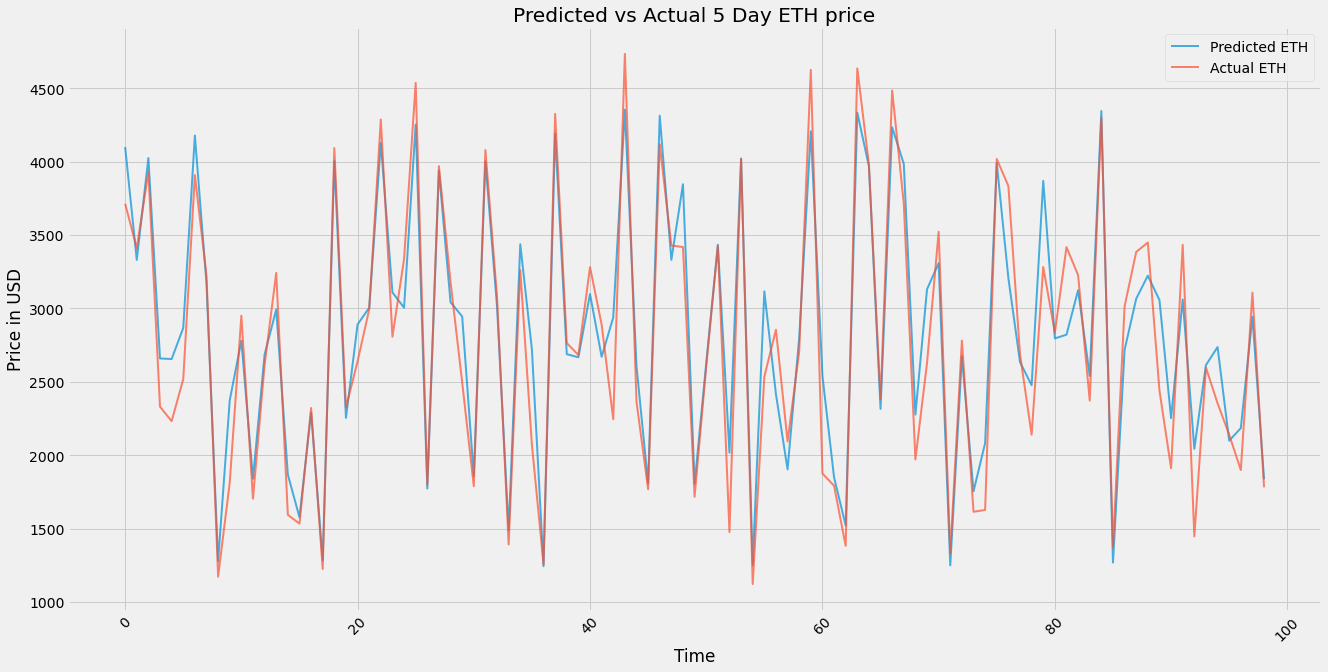

In [17]:
# Plot the predicted vs actual values
plt.figure(figsize=(20,10))
plt.plot(svm_prediction, label='Predicted ETH', lw=2, alpha=.7)
plt.plot(y_test, label='Actual ETH', lw=2, alpha=.7)
plt.title('Predicted vs Actual 5 Day ETH price')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()